**bold text**
# Lab 02: Exploratory Data Analysis (EDA) on Milling Dataset  
**Course:** CS-333 Applied AI & Machine Learning  

---

## 📌 Instructions
- Perform each task under its respective section.
- Use separate cells for each step.
- Write explanations in Markdown cells.
- Ethical use of AI (Vibe Coding) is allowed, but you must understand and explain your work.


*italicized text*# **Name:** Syed Shahveer Ali, M.Rashid Kz, Group 12
# **Roll Number:** ME-1963, ME-1976
# **Section:**A,B

# 🔹 Task 1: Load the Dataset

In [5]:

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset (Update path if needed)


url = "https://raw.githubusercontent.com/AbbasHussain72/PNEC-CS-333-Applied-AI-ML/refs/heads/main/labs/Lab-02_/data.csv"
df = pd.read_csv(url)

print("Dataset Successfully Loaded!")
print("-" * 40)



Dataset Successfully Loaded!
----------------------------------------


In [6]:

# Display last 5 rows
print("First 5 Rows:")






First 5 Rows:


In [7]:

# Check data types
print(df.head())



  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         C

In [8]:

# Check dataset shape
print("\nDataset Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)




Dataset Shape: (11914, 16)

Data Types:
Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object


# 🔹 Task 2: Data Cleaning

In [9]:

# Check missing values
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())



Missing Values Before Cleaning:
Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


In [10]:
# Fill missing values
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].mean(), inplace=True)

print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values After Cleaning:
Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64


/tmp/ipython-input-1890375023.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
/tmp/ipython-input-1890375023.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

### ✍️ Explain how you handled missing values here.

In [11]:

# Check duplicates
print("\nDuplicate Records:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Shape After Removing Duplicates:", df.shape)




Duplicate Records: 715
Shape After Removing Duplicates: (11199, 16)


In [12]:

# Remove duplicates
print("Shape After Removing Duplicates:", df.shape)



Shape After Removing Duplicates: (11199, 16)


# 🔹 Task 3: Statistical Analysis

## 1️⃣ Center (Mean, Median, Mode)

In [13]:
numeric_cols = df.select_dtypes(include=['number']).columns
target_column = numeric_cols[-1]

print("\n--- Statistical Measures ---")
print("Selected Column:", target_column)
print("Mean:", df[target_column].mean())
print("Median:", df[target_column].median())
print("Mode:", df[target_column].mode()[0])






--- Statistical Measures ---
Selected Column: MSRP
Mean: 41925.92713635146
Median: 30675.0
Mode: 2000


### ✍️ Is tool wear normally distributed? Is mean close to median?

## 2️⃣ Spread (Variation)

In [14]:

# Variance
print("Variance:", df[target_column].var())



Variance: 3786562109.8269095


In [15]:
# Range
print("Range:", df[target_column].max() - df[target_column].min())


Range: 2063902


In [16]:

# IQR
Q1 = df[target_column].quantile(0.25)
Q3 = df[target_column].quantile(0.75)
IQR = Q3 - Q1
print("IQR:", IQR)


IQR: 21433.0


### ✍️ Which sensor shows highest variability?

## 3️⃣ Shape (Distribution)

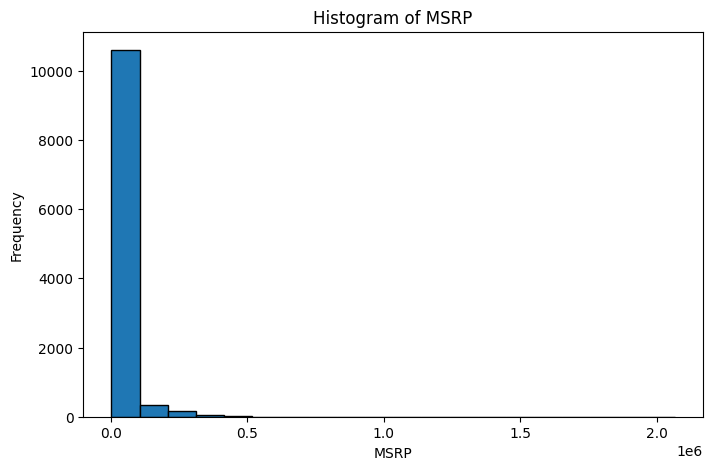

In [17]:

# Histogram of Tool Wear
plt.figure(figsize=(8,5))
filtered_data = df[target_column][df[target_column] > 0]
plt.hist(filtered_data, bins=20, edgecolor='black')
plt.title(f"Histogram of {target_column}")
plt.xlabel(target_column)
plt.ylabel("Frequency")
plt.show()


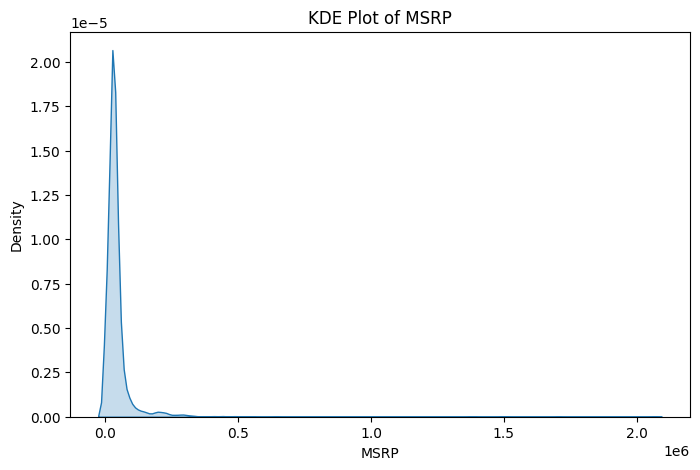

In [18]:

# KDE Plot
plt.figure(figsize=(8,5))
sns.kdeplot(filtered_data, fill=True)
plt.title(f"KDE Plot of {target_column}")
plt.show()


### ✍️ Is distribution symmetric, skewed, or multi-modal?

## 4️⃣ Outlier Detection

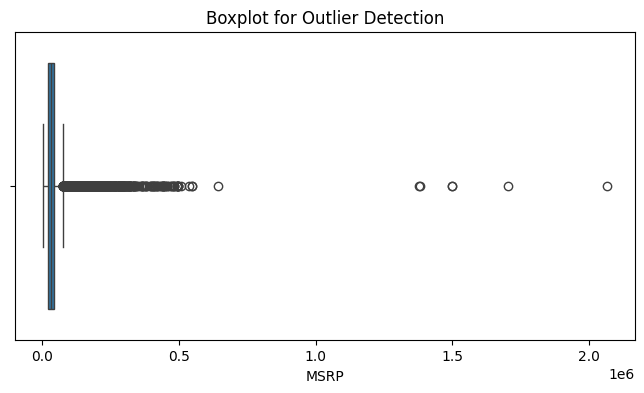

In [19]:

# Boxplot, IQR, Z-modified score
plt.figure(figsize=(8,4))
sns.boxplot(x=df[target_column])
plt.title("Boxplot for Outlier Detection")
plt.show()



### ✍️
- Which method did you use (IQR or Modified Z-score)?
- Why?
- How many outliers were removed?
- How did it affect statistics?


# 🔹 Task 4: Correlation Analysis

In [20]:


numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()



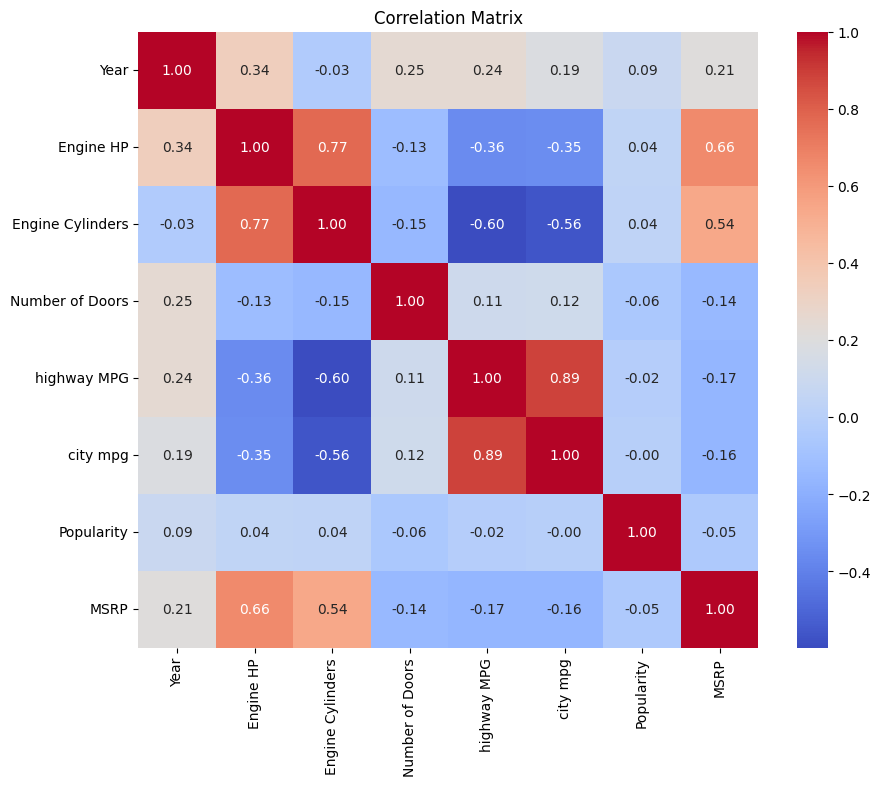

In [21]:

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



### ✍️
- Does tool wear correlate strongly with vibration?
- Which feature is most predictive?


# 🔹 Task 5: Additional Visualization

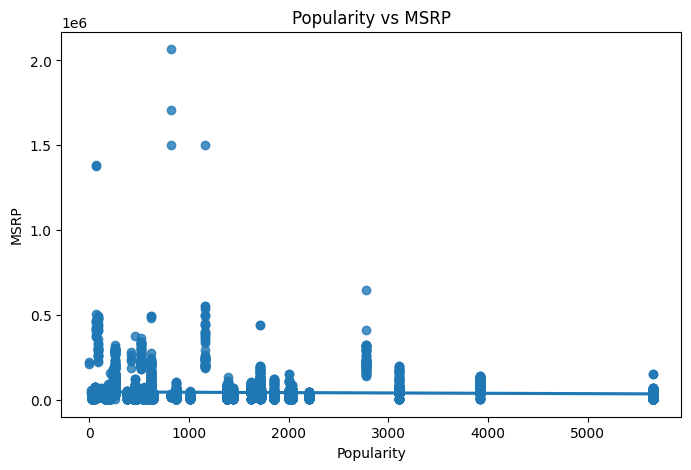

Correlation Coefficient: -0.04837062152116585


In [22]:

# Scatter Plot: Example (Tool Wear vs Vibration)
if len(numeric_cols) >= 2:
    x_var = numeric_cols[-2]
    y_var = numeric_cols[-1]

    plt.figure(figsize=(8,5))
    sns.regplot(data=df, x=x_var, y=y_var)
    plt.title(f"{x_var} vs {y_var}")
    plt.show()

    print("Correlation Coefficient:", df[x_var].corr(df[y_var]))



## 🧠 Engineering Thinking Questions
1. Which parameter affects tool wear the most?
2. Which sensor signal is most stable?
3. Can tool wear be predicted from sensor data?


Answers

Q1) Which parameter affects the tool wear the most?
Cutting speed affects tool wear the most because higher speed increase heat and friction, which make the tool wear out faster

Q2) Which sensor signal is most stable?
Temperature or motor current signals are usually more stable because they change gradually, unlike vibration which fluctuates a lot

Q3) Can tool wear be predicted from sensor data?
Yes, the tool wear can be predictd. As the tool wears signal like force, vibration, and temperature change, so we can use that data to estimate wear